In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(['science', 'notebook', 'grid'])

Firstly, import the training data, and create the normalised time corresponding to each datapoint.

In [2]:
data_list = []
i = 0
while True:
    try:
        file_path = f"C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Technique Modelling\\Bicep Curl\\Perfect Technique Modelling\\Training Data\\Conc{i}.npy"
        data_inst = np.load(file_path)
        data_list.append(data_inst)
        i+=1
        
    except FileNotFoundError:
            break
Data = np.concatenate(data_list)
Time = np.linspace(0,1,Data.shape[1])

In [3]:
mean = np.mean(Data,axis=0)
mean.shape, i

((15, 3), 5)

Note that since we are performing regression, each single datapoint is independent and isn't treated as if it is ina sequence of length 15. So, we need to shuffle the data to avoid some unwanted biases when training. To do this we need to reshape the Data array so that is is one long array with length equal to 15*current length of Data, but also we want to preseve the 3 dimensions representing the 3 different angle coordinates. Also we need to make sure that there is a corresponding array of times for each instance in the data.

In [4]:
#Reshape the data and name it y since this will be the output of the regression model
y = Data.reshape(Data.shape[0]*Data.shape[1], Data.shape[2])

#Now create the corresponding times, and name X as it will be the input of the model.
X = np.tile(Time, (Data.shape[0]))

#Now shuffle the data
perm = np.random.permutation(X.shape[0])
X = X[perm]
y = y[perm]

Now create the model

In [5]:
regression = Sequential()
regression.add(Input(shape=(1,)))
regression.add(Dense(units=6, activation='tanh'))
regression.add(Dense(units=6, activation='tanh'))
regression.add(Dense(units=6, activation='tanh'))
regression.add(Dense(units=6, activation='tanh'))
regression.add(Dense(units=6, activation='tanh'))
regression.add(Dense(units=6, activation='tanh'))
# regression.add(Dense(units=6, activation='tanh'))
# regression.add(Dense(units=6, activation='tanh'))
regression.add(Dense(units=3, activation='linear'))

regression.compile(loss='mean_squared_error', optimizer='adam')
regression.fit(X, y, epochs=1000, batch_size=20)

Epoch 1/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0279 
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0137
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0112
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0099
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073
Epoch 7/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.00484
Epoch 8/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 9/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013
Epoch 10/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011
Epoch 11/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010
Epoch 12/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010    
Epoch 13/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010    
Epoch 14/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010
Epoch 15/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010
Epoch 157/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010
Epoch 158/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9059e-04
Epoch 159/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011
Epoch 160/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010   
Epoch 161/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010
Epoch 162/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9778e-04
Epoch 163/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.4081e-04
Epoch 164/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2432e-04
Epoch 165/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010   
Epoch 166/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.8933e-04
Epoch 167/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010      
Epoch 168/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.7393e-04
Epoch 169/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010    
Epoch 170

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.0010  
Epoch 234/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 9.8055e-04
Epoch 235/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 9.6876e-04
Epoch 236/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 9.5128e-04
Epoch 237/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011
Epoch 238/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 
Epoch 239/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010    
Epoch 240/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.0010
Epoch 241/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 9.7227e-04
Epoch 242/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.8776e-04
Epoch 243/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.0010
Epoch 244/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5996e-04
Epoch 245/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9057e-04 
Epoch 246/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5943e-04
Epoch 386/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 9.2673e-04
Epoch 387/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.0010
Epoch 388/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9320e-04
Epoch 389/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.4841e-04
Epoch 390/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 9.5805e-04
Epoch 391/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5275e-04
Epoch 392/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.4136e-04
Epoch 393/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6553e-04
Epoch 394/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.7299e-04
Epoch 395/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 0.0010 
Epoch 396/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6042e-04
Epoch 397/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.8969e-04
Epoch 398/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.7

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.4930e-04
Epoch 538/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 0.0010
Epoch 539/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.0978e-04  
Epoch 540/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010
Epoch 541/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6209e-04
Epoch 542/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 9.5369e-04
Epoch 543/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010
Epoch 544/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5306e-04
Epoch 545/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010
Epoch 546/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3839e-04
Epoch 547/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2346e-04
Epoch 548/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2439e-04
Epoch 549/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7904e-04
Epoch 550/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3996e-04
Epo

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010
Epoch 690/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 9.3699e-04
Epoch 691/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010
Epoch 692/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 9.0619e-04
Epoch 693/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 9.0169e-04
Epoch 694/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.9702e-04
Epoch 695/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.4560e-04
Epoch 696/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2356e-04
Epoch 697/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2639e-04
Epoch 698/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.1917e-04
Epoch 699/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010    
Epoch 700/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9268e-04
Epoch 701/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.4399e-04
Epoch 702/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.6393

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 0.0010
Epoch 842/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6178e-04
Epoch 843/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010  
Epoch 844/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.0010   
Epoch 845/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7280e-04
Epoch 846/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.0010 
Epoch 847/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 9.4608e-04
Epoch 848/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.4722e-04
Epoch 849/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.4171e-04
Epoch 850/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.8412e-04
Epoch 851/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 9.7605e-04
Epoch 852/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.0563e-04
Epoch 853/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.8106e-04
Epoch 854/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.24

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0854e-04  
Epoch 994/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9771e-04
Epoch 995/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9371e-04
Epoch 996/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.7303e-04
Epoch 997/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 0.0010
Epoch 998/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2210e-04
Epoch 999/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 9.5020e-04
Epoch 1000/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.5647e-04


Now plot the results

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Text(0, 0.5, '$cos(angle)$')

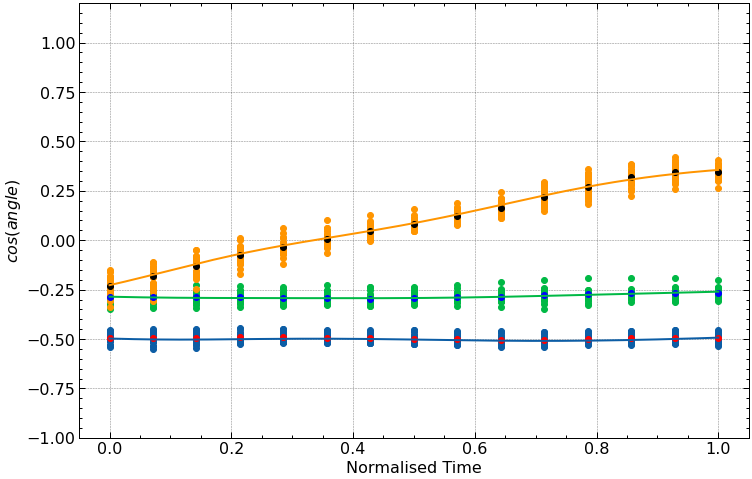

In [6]:
plt.figure(figsize=(12,8))
plt.ylim(-1,1.2)

#First plot all the training data
plt.scatter(X, y[:,0])
plt.scatter(X, y[:,1])
plt.scatter(X, y[:,2])

plt.scatter(Time, mean[:,0],c='r')
plt.scatter(Time, mean[:,1],c='b')
plt.scatter(Time, mean[:,2],c='black')

#Now plot the function
t = np.linspace(0,1,200)
res = regression.predict(t)
plt.plot(t,res)
plt.xlabel('Normalised Time')
plt.ylabel(r'$cos(angle)$')

Save the model so that I can use it to make predictions in another file.

In [7]:
regression.save('C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Technique Modelling\\Bicep Curl\\Perfect Technique Modelling\\Models\\Regression.h5')

Note that at the moment that I haven't tried to perfect this model at all, I may come back to do that, but for now I will move on.